In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Import Dataset

In [ ]:
from google.colab import drive #import data
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Exploratory Data Analysis

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
def bar_plot(variable):
    var =data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,7))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)

    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

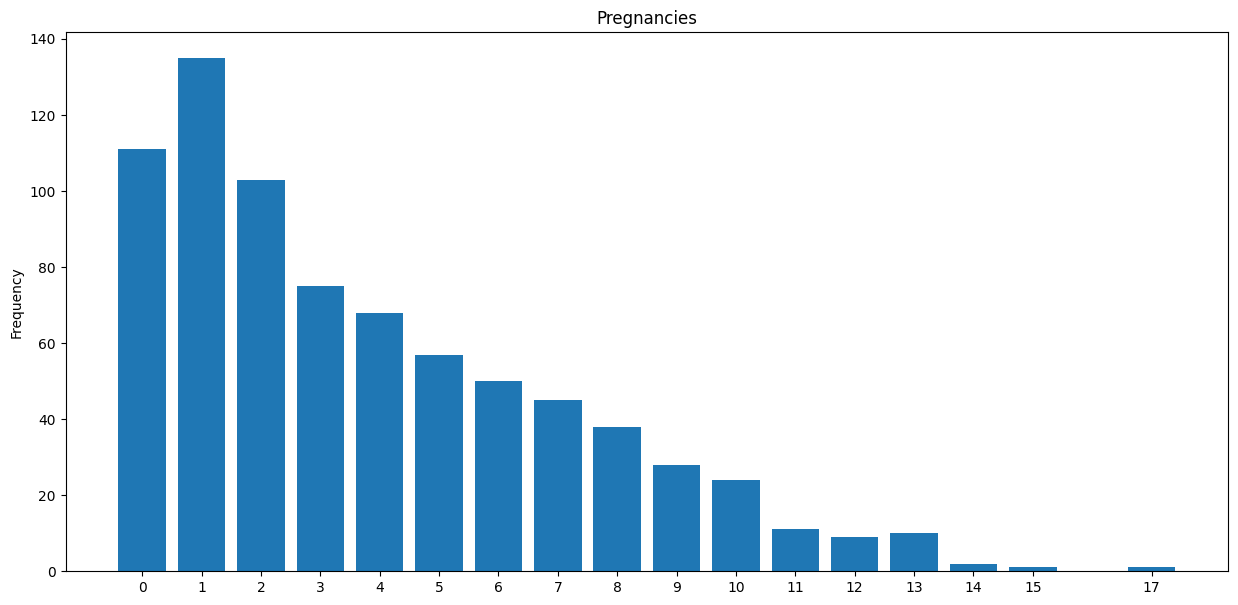

Pregnancies: 
 Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64


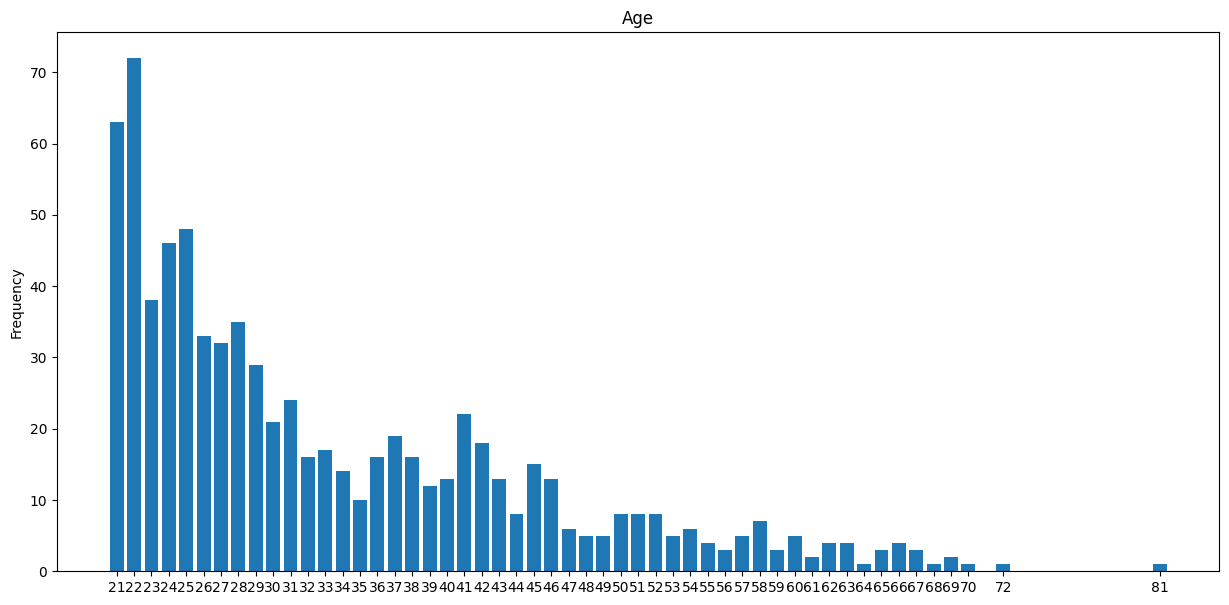

Age: 
 Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64


In [ ]:
category1 = ['Pregnancies','Age']

for c in category1:
    bar_plot(c)

## Cek Distribusi Data

<Axes: xlabel='Age', ylabel='count'>

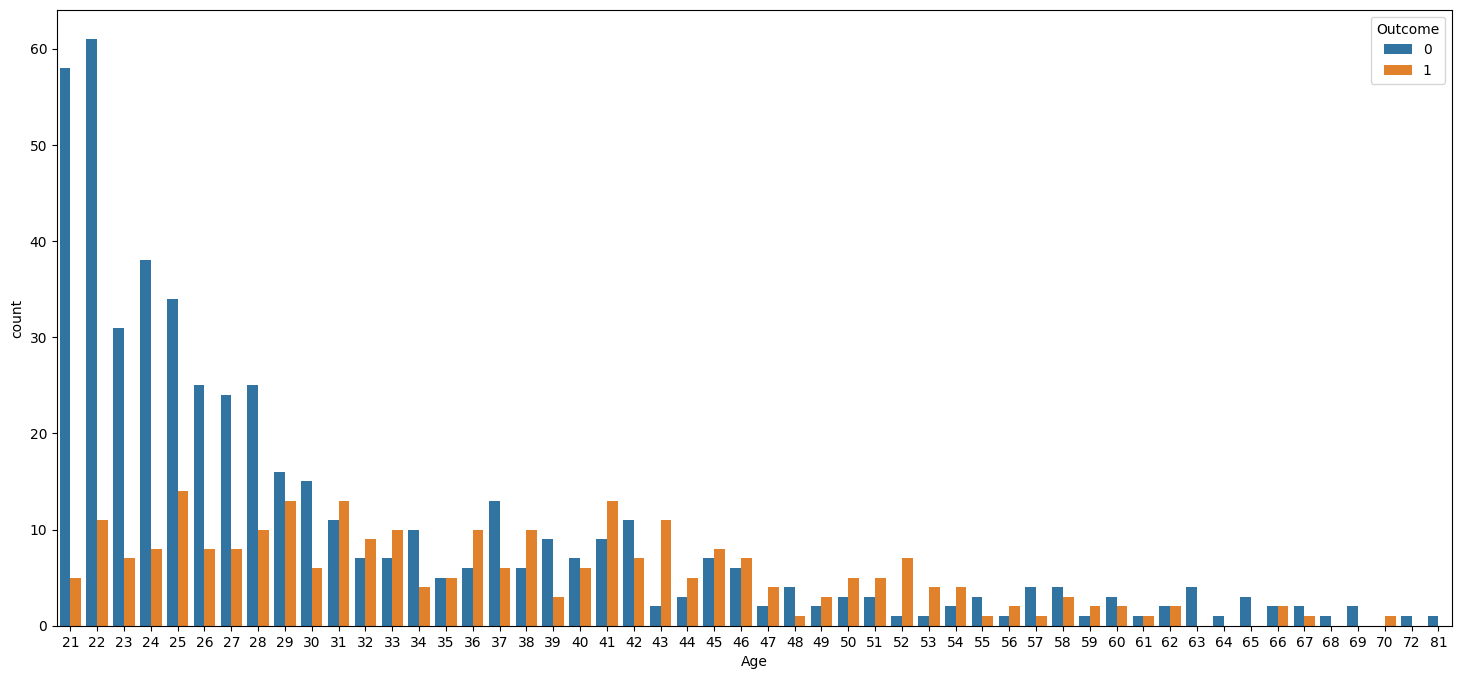

In [ ]:
from matplotlib import pyplot
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(x='Age',hue='Outcome',data=data, linewidth=1,ax=ax)

<Axes: xlabel='Pregnancies', ylabel='count'>

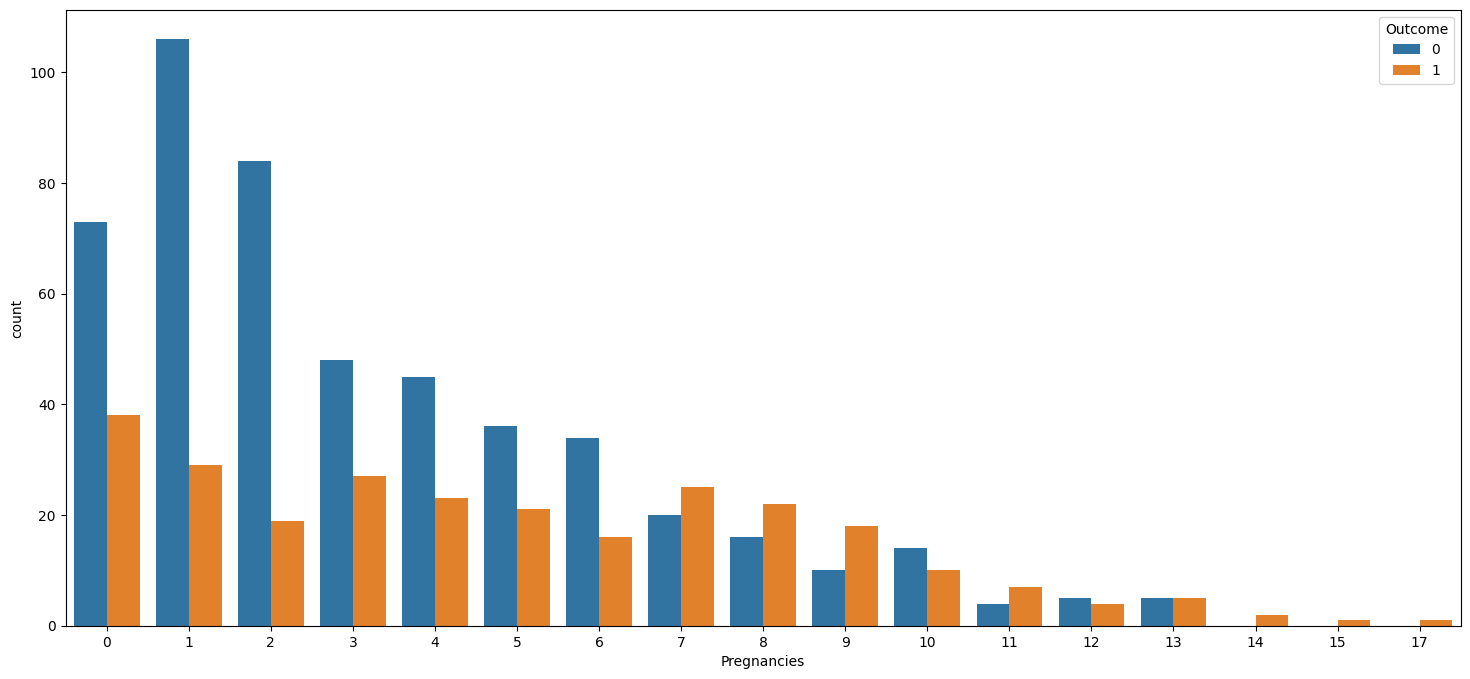

In [ ]:
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(x='Pregnancies',hue='Outcome',data=data, linewidth=1,ax=ax)

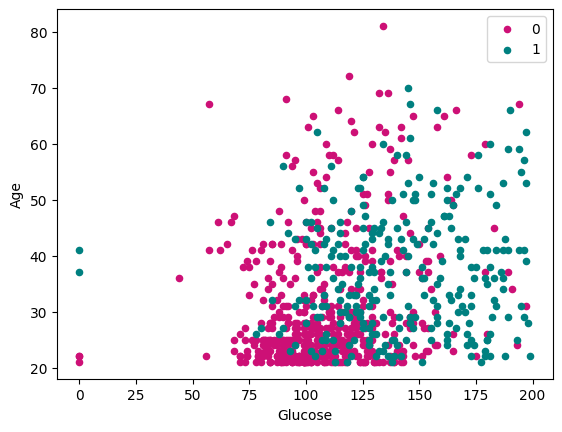

In [ ]:
colors = {0:'#cd1076', 1:'#008080'}
fig, ax = plt.subplots()
grouped = data.groupby('Outcome')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter'
               ,x='Glucose', y='Age', label=key
               ,color=colors[key])
plt.show()

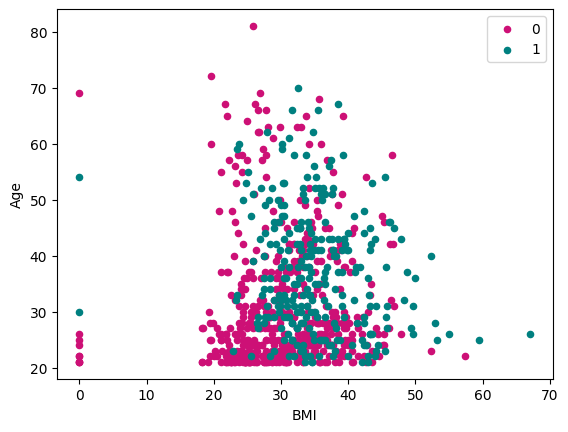

In [ ]:
colors = {0:'#cd1076', 1:'#008080'}
fig, ax = plt.subplots()
grouped = data.groupby('Outcome')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter'
               ,x='BMI', y='Age', label=key
               ,color=colors[key])
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


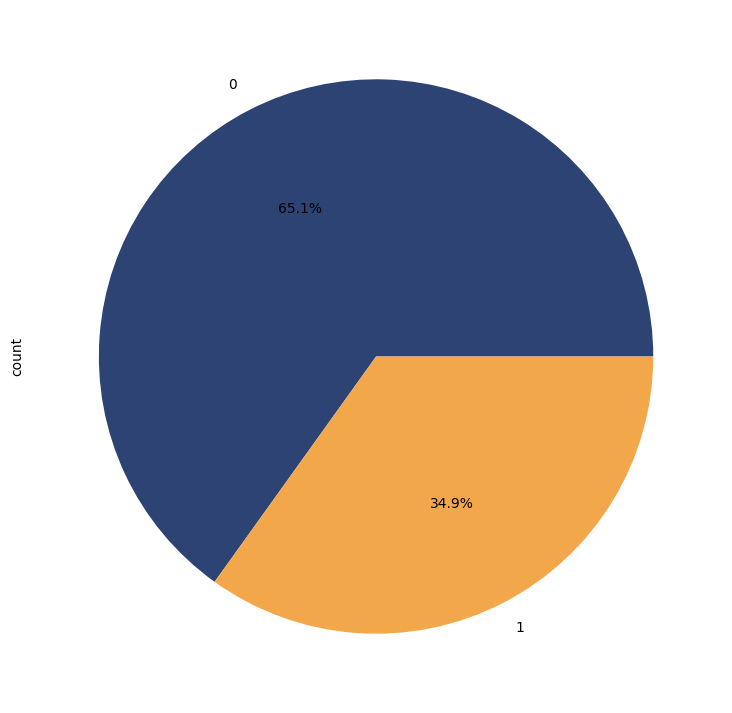

In [ ]:
data['Outcome'].value_counts().plot(kind='pie',colors=['#2C4373', '#F2A74B'],autopct='%1.1f%%',figsize=(9,9))
plt.show
varValue = data.Outcome.value_counts()
print(varValue)

# Outlier Handling

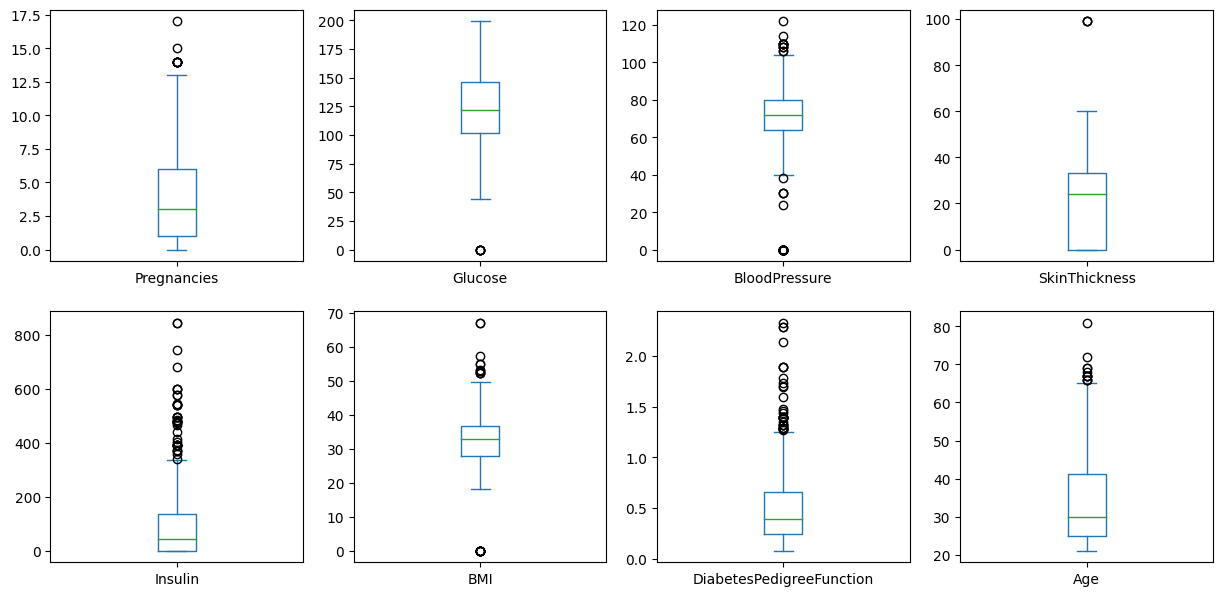

In [ ]:
#Cek Outliernya
data1=data.drop('Outcome',axis=1)
data1.plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False ,figsize =(15,15))
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest
from collections import Counter
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1)
clf.fit(data)
y_pred_train = clf.predict(data)
sayı = Counter(y_pred_train)
print(sayı)

Counter({1: 900, -1: 100})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [ ]:
data.loc[detect_outliers(data,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
349,5,0,80,32,0,41.0,0.346,37,1
349,5,0,80,32,0,41.0,0.346,37,1
349,5,0,80,32,0,41.0,0.346,37,1
78,0,131,0,0,0,43.2,0.270,26,1


In [ ]:
data = data.drop([298,349,78,261,193,706,125,177,579,220,715,655,584,618,661,659,45,243], axis=0)

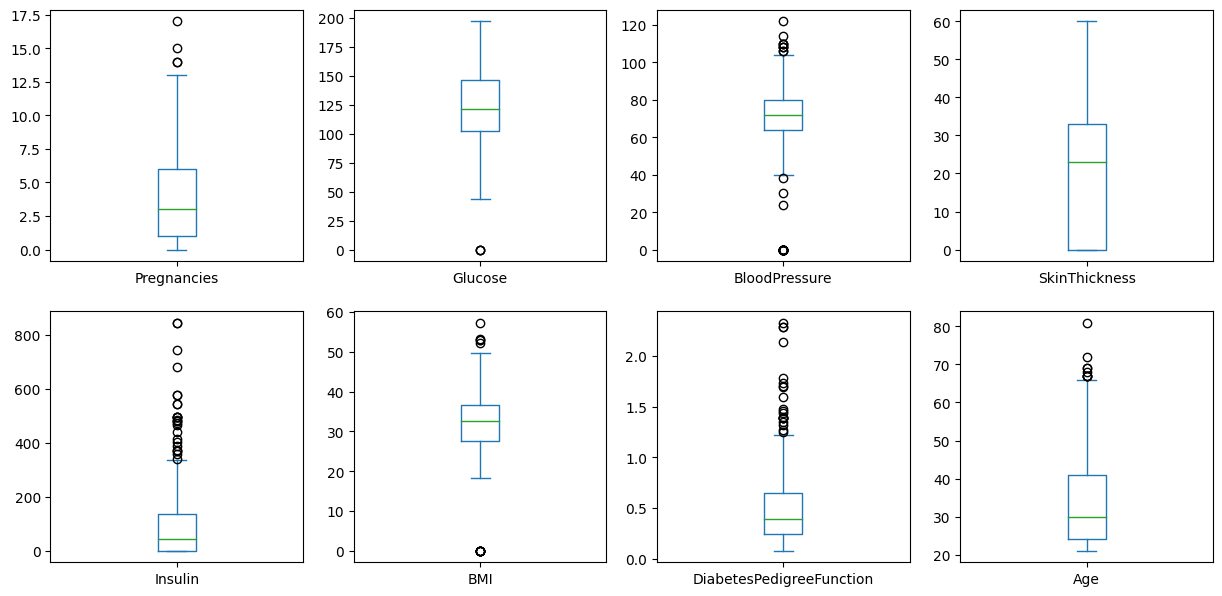

In [ ]:
data1=data.drop('Outcome',axis=1)
data1.plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False ,figsize =(15,15))
plt.show()

# Feature Selection

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


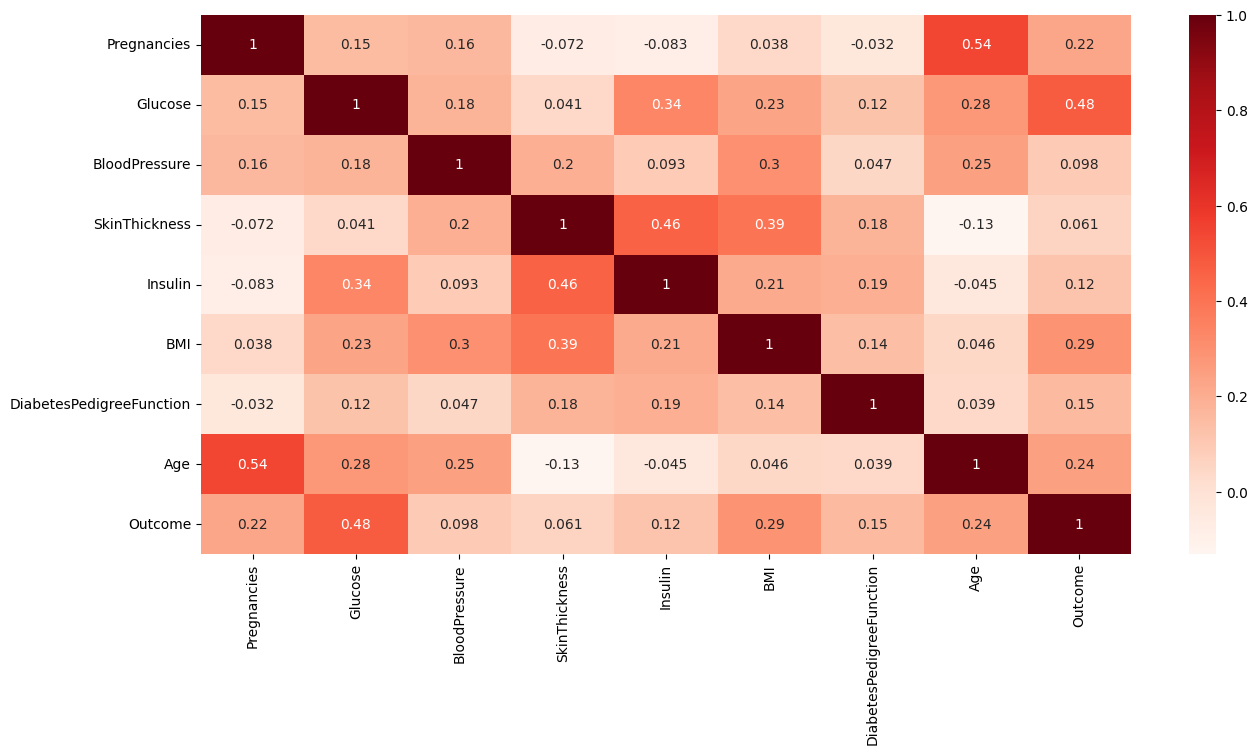

Pregnancies    0.224329
Glucose        0.479417
BMI            0.288845
Age            0.244905
Outcome        1.000000
Name: Outcome, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data["Outcome"] = data["Outcome"]
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
print(data.head())

plt.figure(figsize=(15,7))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

cor_target = abs(cor["Outcome"])  # absolute value
# High Correlations
relevant_features = cor_target[cor_target >= 0.2]
print(relevant_features)

In [ ]:
newdata=data.drop(['BloodPressure', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction'],axis=1)

In [ ]:
newdata.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1


In [ ]:
data=pd.DataFrame(newdata)

# Normalisasi

In [ ]:
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, 0:4]
Y = data.iloc[:, 4]
nd = StandardScaler()
nd.fit(X)
X =nd.transform(X)
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 750, dtype: int64


# Sebelum Balancing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn import model_selection

X = data.iloc[:, 0:4]
Y = data.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

#to plot a graph
accuracies ={}
means={}
randoms={}

## PURE XGBOOST

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)
predicted = model.predict(X_test)


print()
print ("The accuracy of XGBoost is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for XGBoost is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for XGBoost is :",recall_score(y_test, predicted,)*100, "%")


The accuracy of XGBoost is :  73.33333333333333 %

Precision score for XGBoost is : 54.54545454545454 %

Recall score for XGBoost is : 66.66666666666666 %


## XGboost manual tuning

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

accuracy = []
precision = []
recall = []
f1 = []

for n in range(1, 11):
    xgb = XGBClassifier(n_estimators=300, learning_rate=0.01, gamma=0, subsample=0.78,
                        colsample_bytree=1, max_depth=n)
    xgb.fit(X_train, y_train)
    prediction = xgb.predict(X_test)

    accuracy.append(accuracy_score(y_test, prediction))
    precision.append(precision_score(y_test, prediction, average='weighted'))
    recall.append(recall_score(y_test, prediction, average='weighted'))
    f1.append(f1_score(y_test, prediction, average='weighted'))

# Calculate the mean and best scores
mean_accuracy = np.mean(accuracy)
mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f1 = np.mean(f1)

best_accuracy = max(accuracy)
best_precision = max(precision)
best_recall = max(recall)
best_f1 = max(f1)

# Print the mean and best scores
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Best Precision: {best_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Best Recall: {best_recall:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")

Mean Accuracy: 0.7433
Best Accuracy: 0.7533
Mean Precision: 0.7602
Best Precision: 0.7794
Mean Recall: 0.7433
Best Recall: 0.7533
Mean F1 Score: 0.7486
Best F1 Score: 0.7608


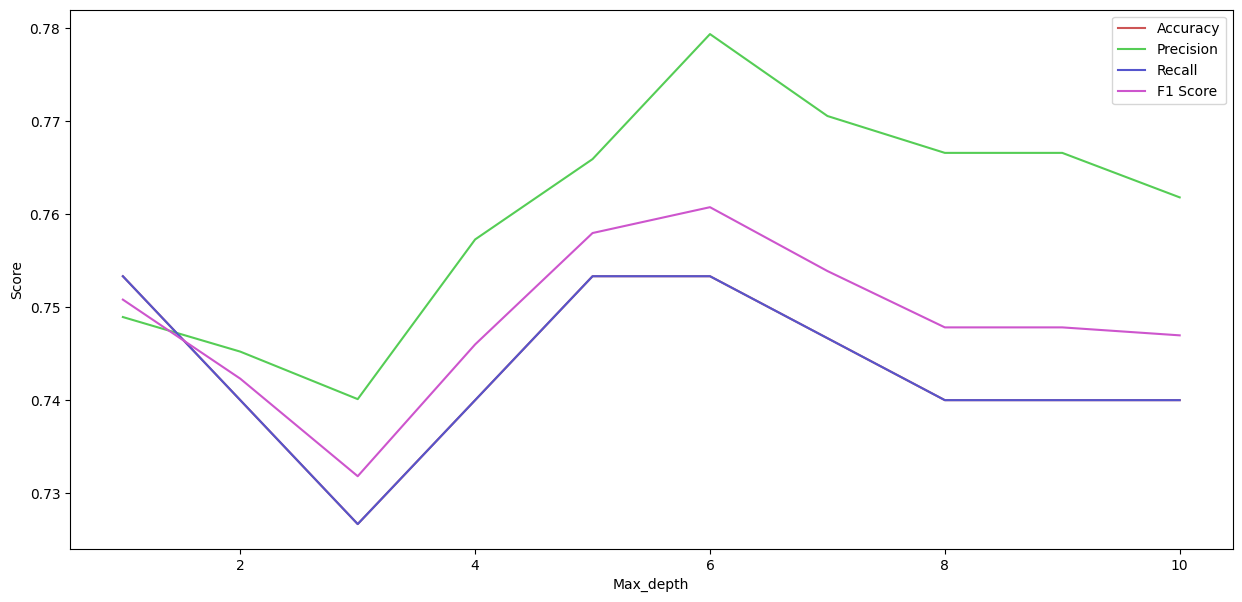

In [ ]:
# Plot the metrics
plt.figure(figsize=(15, 7))
plt.plot(range(1, 11), accuracy, label='Accuracy', color='#cd5555')
plt.plot(range(1, 11), precision, label='Precision', color='#55cd55')
plt.plot(range(1, 11), recall, label='Recall', color='#5555cd')
plt.plot(range(1, 11), f1, label='F1 Score', color='#cd55cd')
plt.xlabel('Max_depth')
plt.ylabel('Score')
plt.legend()
plt.show()


##XGBoost RandomizedSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the parameter grid
xgb_params = {
    'learning_rate': [0.08, 0.06, 0.04, 0.09],
    'max_depth': range(1, 40),
    'n_estimators': [100, 200, 300, 500, 1000]
}

# Initialize the classifier
xgb = XGBClassifier()

# Perform Randomized Search CV
xgb_randomcv_model = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params,
                                        n_iter=50, cv=5, scoring='accuracy',
                                        n_jobs=-1, verbose=2).fit(X_train, y_train)

# Print the best parameters and best accuracy score
print("Best parameters found: ", xgb_randomcv_model.best_params_)
print("Best randomized search accuracy: {:.4f}".format(xgb_randomcv_model.best_score_))

# Get the best model
best_model = xgb_randomcv_model.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Store the best accuracy in the dictionary
random = xgb_randomcv_model.best_score_ * 100
randoms = {'XGBoost': random}

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'n_estimators': 1000, 'max_depth': 1, 'learning_rate': 0.06}
Best randomized search accuracy: 0.7833
Test Accuracy: 0.7400
Test Precision: 0.7417
Test Recall: 0.7400
Test F1 Score: 0.7408


## XGBOOST Grid Search
Laptopnya ndak kuat ngejalanin ini sih

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_params = { 'learning_rate' : [0.08, 0.06, 0.04, 0.09],
    'max_depth': range(1,40),
    'n_estimators': [100, 200, 300,500,1000]}
xgb =XGBClassifier()
xgb_gridcv_model = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(xgb_gridcv_model.best_params_)
print('rf gridcv model accuracy score = {}'.format(xgb_gridcv_model.best_score_))
acc=xgb_gridcv_model.best_score_ *100
accuracies[' XGBoost Gridsearch']=acc

Fitting 5 folds for each of 780 candidates, totalling 3900 fits


KeyboardInterrupt: 

## XGBoost Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from xgboost import XGBClassifier

# Define the KFold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
modelL = XGBClassifier(n_estimators=100, max_depth=11, learning_rate=0.09)

# Perform cross-validation scoring for accuracy
results = cross_val_score(modelL, X, Y, cv=kfold)
print("Cross-validation scores for accuracy:", results)
print("Mean cross-validation accuracy: {:.2f}%".format(results.mean() * 100))

# Initialize lists to store scores
precision_scores = []
recall_scores = []
f1_scores = []

# Perform cross-validation predictions
for train_index, test_index in kfold.split(X):
    modelL.fit(X.iloc[train_index], Y.iloc[train_index])
    y_pred = modelL.predict(X.iloc[test_index])
    precision_scores.append(precision_score(Y.iloc[test_index], y_pred, average='weighted'))
    recall_scores.append(recall_score(Y.iloc[test_index], y_pred, average='weighted'))
    f1_scores.append(f1_score(Y.iloc[test_index], y_pred, average='weighted'))

# Calculate the mean of the scores
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# Print the calculated metrics
print(f"Mean Precision: {mean_precision:.2f}")
print(f"Mean Recall: {mean_recall:.2f}")
print(f"Mean F1 Score: {mean_f1:.2f}")

# Store the mean accuracy in the dictionary
mean_accuracy = results.mean() * 100
means = {
    'XGBoost Accuracy': mean_accuracy,
    'XGBoost Precision': mean_precision * 100,
    'XGBoost Recall': mean_recall * 100,
    'XGBoost F1': mean_f1 * 100
}

# Print the dictionary with the stored scores
print("Stored mean scores:", means)

Cross-validation scores for accuracy: [0.76       0.71333333 0.72666667 0.72       0.8       ]
Mean cross-validation accuracy: 74.40%
Mean Precision: 0.74
Mean Recall: 0.74
Mean F1 Score: 0.74
Stored mean scores: {'XGBoost Accuracy': 74.4, 'XGBoost Precision': 74.43249278901452, 'XGBoost Recall': 74.4, 'XGBoost F1': 74.30952176848027}


# With Balanced Dataset
Keliatan banget ndak seimbang sih dari di atas

##SMOTE

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify the class distribution
print("Original class distribution:")
print(y_train.value_counts())
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Original class distribution:
Outcome
0    394
1    206
Name: count, dtype: int64
Class distribution after SMOTE:
Outcome
0    394
1    394
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Show the class distribution before balancing
print("Class distribution before balancing:")
print(data['Outcome'].value_counts())

Class distribution before balancing:
Outcome
0    500
1    250
Name: count, dtype: int64


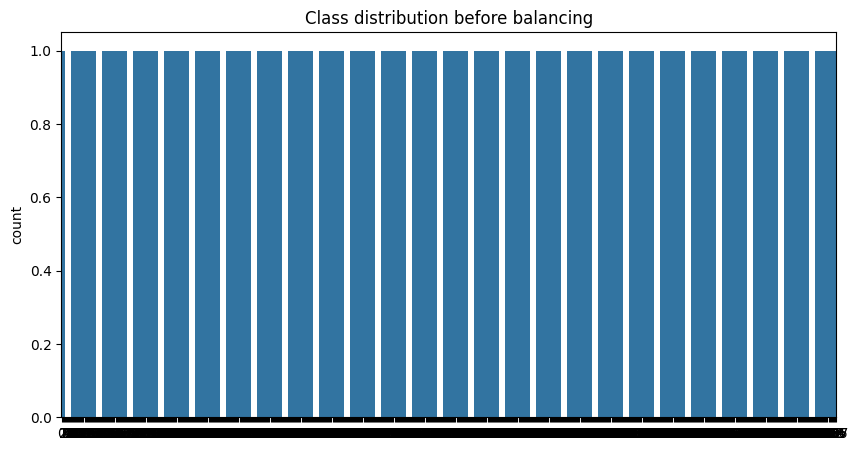

In [ ]:
# Plot class distribution before balancing
plt.figure(figsize=(10, 5))
sns.countplot(data['Outcome'])
plt.title("Class distribution before balancing")
plt.show()

In [ ]:
# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
# Apply SMOTE to the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Combine the resampled features and target into a new DataFrame
data_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Outcome'])], axis=1)

In [ ]:
# Show the class distribution after balancing
print("Class distribution after balancing:")
print(data_balanced['Outcome'].value_counts())

Class distribution after balancing:
Outcome
1    500
0    500
Name: count, dtype: int64


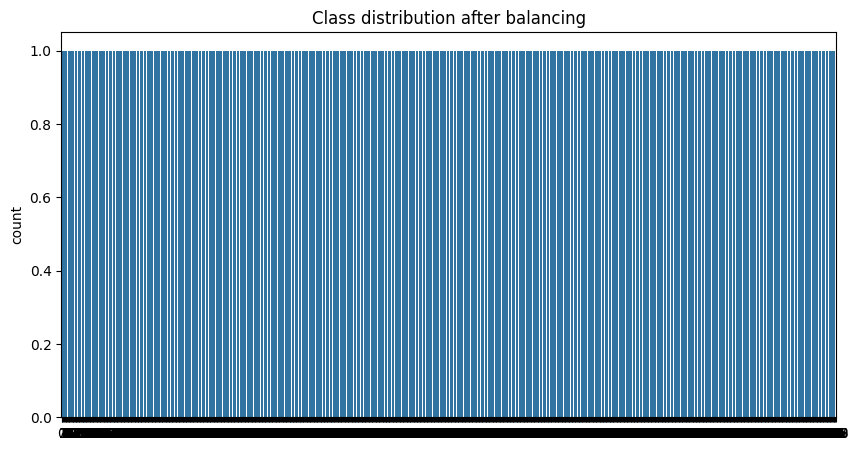

In [ ]:
# Plot class distribution after balancing
plt.figure(figsize=(10, 5))
sns.countplot(data_balanced['Outcome'])
plt.title("Class distribution after balancing")
plt.show()

## Oversampling
Sebenarnya lebih optimal menggunakan ini

In [ ]:
from sklearn.utils import resample
df_majority = data.loc[data.Outcome == 0].copy()
df_minority = data.loc[data.Outcome == 1].copy()
df_minority_upsampled = resample(df_minority,
                             replace=True,  # sample with replacement
                            n_samples=500,  # to match majority class
                            random_state=123)
data = pd.concat([df_majority, df_minority_upsampled])

Outcome
0    500
1    500
Name: count, dtype: int64


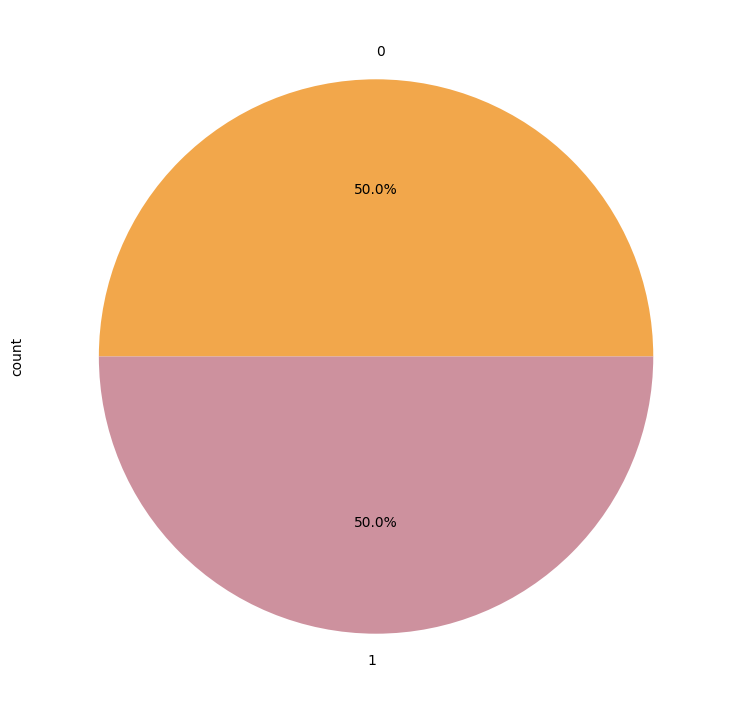

In [ ]:
data['Outcome'].value_counts().plot(kind='pie',colors=['#F2A74B', '#cd919e'],autopct='%1.1f%%',figsize=(9,9))
plt.show
varValue = data.Outcome.value_counts()
print(varValue)

## Persiapan Model untuk Classfier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn import model_selection

X = data.iloc[:, 0:4]
Y = data.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

#to plot a graph
accuracies ={}
means={}
randoms={}

## PURE XGBOOST

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)
predicted = model.predict(X_test)


print()
print ("The accuracy of XGBoost is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for XGBoost is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for XGBoost is :",recall_score(y_test, predicted,)*100, "%")


The accuracy of XGBoost is :  73.33333333333333 %

Precision score for XGBoost is : 54.54545454545454 %

Recall score for XGBoost is : 66.66666666666666 %


## XGboost manual tuning

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

accuracy = []
precision = []
recall = []
f1 = []

for n in range(1, 11):
    xgb = XGBClassifier(n_estimators=300, learning_rate=0.01, gamma=0, subsample=0.78,
                        colsample_bytree=1, max_depth=n)
    xgb.fit(X_train, y_train)
    prediction = xgb.predict(X_test)

    accuracy.append(accuracy_score(y_test, prediction))
    precision.append(precision_score(y_test, prediction, average='weighted'))
    recall.append(recall_score(y_test, prediction, average='weighted'))
    f1.append(f1_score(y_test, prediction, average='weighted'))

# Calculate the mean and best scores
mean_accuracy = np.mean(accuracy)
mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f1 = np.mean(f1)

best_accuracy = max(accuracy)
best_precision = max(precision)
best_recall = max(recall)
best_f1 = max(f1)

# Print the mean and best scores
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Best Precision: {best_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Best Recall: {best_recall:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")

Mean Accuracy: 0.7433
Best Accuracy: 0.7533
Mean Precision: 0.7602
Best Precision: 0.7794
Mean Recall: 0.7433
Best Recall: 0.7533
Mean F1 Score: 0.7486
Best F1 Score: 0.7608


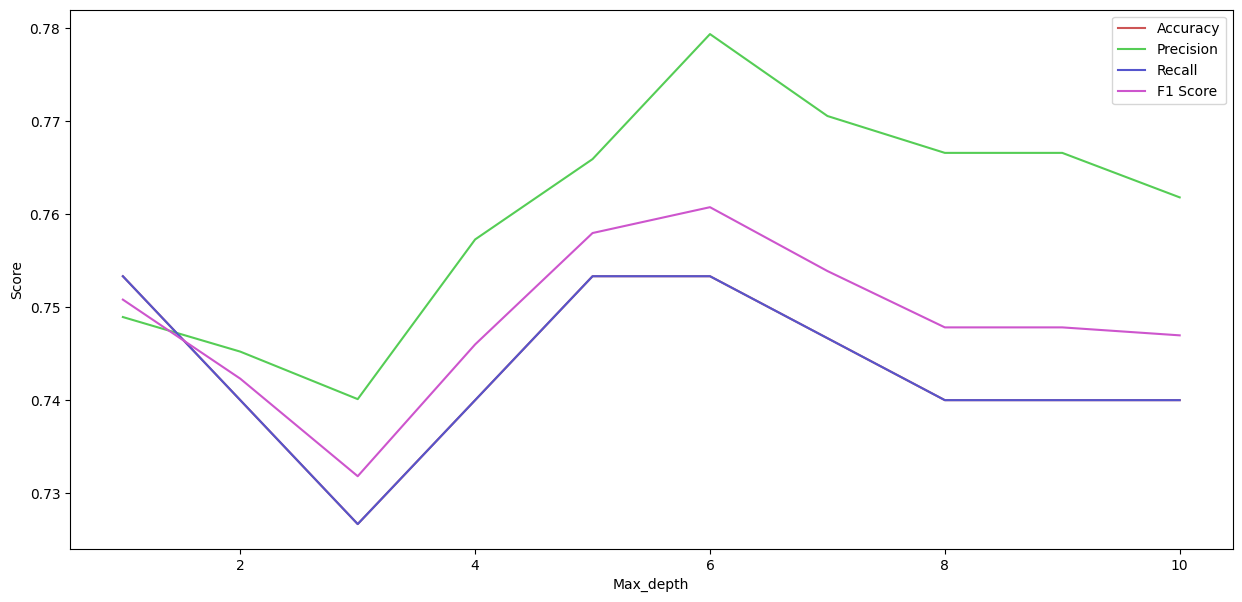

In [ ]:
# Plot the metrics
plt.figure(figsize=(15, 7))
plt.plot(range(1, 11), accuracy, label='Accuracy', color='#cd5555')
plt.plot(range(1, 11), precision, label='Precision', color='#55cd55')
plt.plot(range(1, 11), recall, label='Recall', color='#5555cd')
plt.plot(range(1, 11), f1, label='F1 Score', color='#cd55cd')
plt.xlabel('Max_depth')
plt.ylabel('Score')
plt.legend()
plt.show()


##XGBoost RandomizedSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the parameter grid
xgb_params = {
    'learning_rate': [0.08, 0.06, 0.04, 0.09],
    'max_depth': range(1, 40),
    'n_estimators': [100, 200, 300, 500, 1000]
}

# Initialize the classifier
xgb = XGBClassifier()

# Perform Randomized Search CV
xgb_randomcv_model = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params,
                                        n_iter=50, cv=5, scoring='accuracy',
                                        n_jobs=-1, verbose=2).fit(X_train, y_train)

# Print the best parameters and best accuracy score
print("Best parameters found: ", xgb_randomcv_model.best_params_)
print("Best randomized search accuracy: {:.4f}".format(xgb_randomcv_model.best_score_))

# Get the best model
best_model = xgb_randomcv_model.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Store the best accuracy in the dictionary
random = xgb_randomcv_model.best_score_ * 100
randoms = {'XGBoost': random}

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.09}
Best randomized search accuracy: 0.7833
Test Accuracy: 0.7600
Test Precision: 0.7522
Test Recall: 0.7600
Test F1 Score: 0.7548


## XGBOOST Grid Search
Laptopnya ndak kuat ngejalanin ini sih

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_params = { 'learning_rate' : [0.08, 0.06, 0.04, 0.09],
    'max_depth': range(1,40),
    'n_estimators': [100, 200, 300,500,1000]}
xgb =XGBClassifier()
xgb_gridcv_model = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print(xgb_gridcv_model.best_params_)
print('rf gridcv model accuracy score = {}'.format(xgb_gridcv_model.best_score_))
acc=xgb_gridcv_model.best_score_ *100
accuracies[' XGBoost Gridsearch']=acc

Fitting 5 folds for each of 780 candidates, totalling 3900 fits
{'learning_rate': 0.09, 'max_depth': 1, 'n_estimators': 1000}
rf gridcv model accuracy score = 0.7883333333333334


## XGBoost Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from xgboost import XGBClassifier

# Define the KFold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
modelL = XGBClassifier(n_estimators=100, max_depth=11, learning_rate=0.09)

# Perform cross-validation scoring for accuracy
results = cross_val_score(modelL, X, Y, cv=kfold)
print("Cross-validation scores for accuracy:", results)
print("Mean cross-validation accuracy: {:.2f}%".format(results.mean() * 100))

# Initialize lists to store scores
precision_scores = []
recall_scores = []
f1_scores = []

# Perform cross-validation predictions
for train_index, test_index in kfold.split(X):
    modelL.fit(X.iloc[train_index], Y.iloc[train_index])
    y_pred = modelL.predict(X.iloc[test_index])
    precision_scores.append(precision_score(Y.iloc[test_index], y_pred, average='weighted'))
    recall_scores.append(recall_score(Y.iloc[test_index], y_pred, average='weighted'))
    f1_scores.append(f1_score(Y.iloc[test_index], y_pred, average='weighted'))

# Calculate the mean of the scores
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# Print the calculated metrics
print(f"Mean Precision: {mean_precision:.2f}")
print(f"Mean Recall: {mean_recall:.2f}")
print(f"Mean F1 Score: {mean_f1:.2f}")

# Store the mean accuracy in the dictionary
mean_accuracy = results.mean() * 100
means = {
    'XGBoost Accuracy': mean_accuracy,
    'XGBoost Precision': mean_precision * 100,
    'XGBoost Recall': mean_recall * 100,
    'XGBoost F1': mean_f1 * 100
}

# Print the dictionary with the stored scores
print("Stored mean scores:", means)

Cross-validation scores for accuracy: [0.76       0.71333333 0.72666667 0.72       0.8       ]
Mean cross-validation accuracy: 74.40%
Mean Precision: 0.74
Mean Recall: 0.74
Mean F1 Score: 0.74
Stored mean scores: {'XGBoost Accuracy': 74.4, 'XGBoost Precision': 74.43249278901452, 'XGBoost Recall': 74.4, 'XGBoost F1': 74.30952176848027}
